In [82]:
import sys
sys.path.append('/home/emmanuel/projects/2019_egp/src')
from data.iasi import IASIOrbits
from experiments.experiment_iasi import GPModels
from models.gp_models import SparseGP
from visualization.iasi import plot_maps

import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import spearmanr, pearsonr, kendalltau

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Load Data

In [54]:
save_path = '/home/emmanuel/projects/2019_egp/data/processed/'

results_xr = xr.open_dataset(f"{save_path}results_egp_v1.nc")
results_xr = results_xr.rename({
    'Temperature':'temperature',
    'basic_pred': 'predictions',
    'basic_std': 'std_dev',
    'error_std': 'estd_dev'
});

# Absolute Error
results_xr['error'] = np.abs(
    results_xr['temperature'] -
    results_xr['predictions']
)

### Plot Labels and Predictions

In [72]:
plot_maps(results_xr, data='labels', projection='robinson', save=True)
plot_maps(results_xr, data='predictions', projection='robinson', save=True)

 /home/emmanuel/.conda/envs/2019_egp/lib/python3.6/site-packages/xarray/core/nanops.py:161: RuntimeWarning:Mean of empty slice


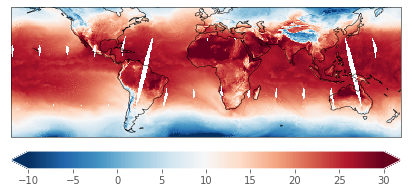

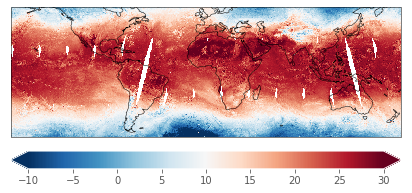

In [71]:
plot_maps(results_xr, data='labels', projection='standard', save=None)
plot_maps(results_xr, data='predictions', projection='standard', save=None)

### Errors Maps

In [73]:
plot_maps(results_xr, data='error', projection='robinson', save=True)

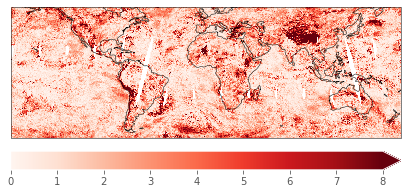

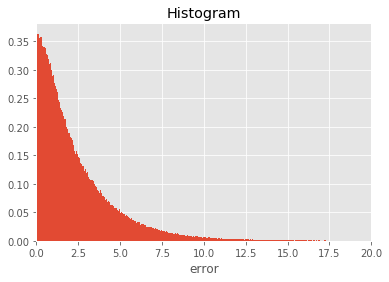

In [74]:
plot_maps(results_xr, data='error', projection='standard', save=None)
results_xr.error.plot.hist(bins=1000, density=True);
plt.xlim([0, 20]);

### Standard Deviations

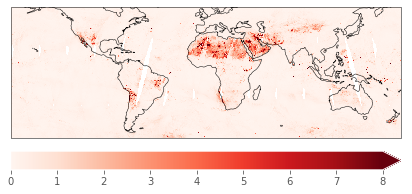

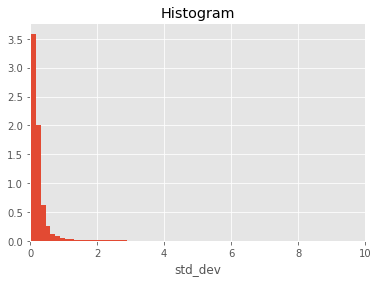

In [75]:
plot_maps(results_xr, data='std', projection='robinson', save=True)
plot_maps(results_xr, data='std', projection='standard', save=None)
results_xr.std_dev.plot.hist(bins=1000, density=True);
plt.xlim([0, 10]);

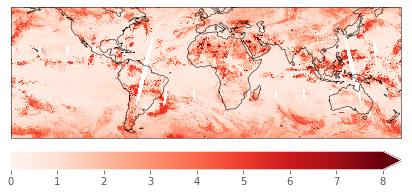

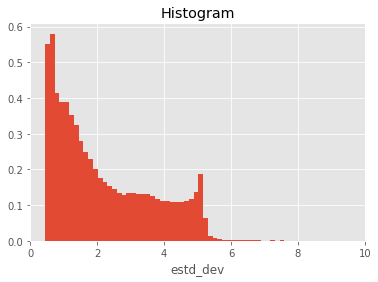

In [76]:
plot_maps(results_xr, data='estd', projection='robinson', save=True)
plot_maps(results_xr, data='estd', projection='standard', save=None)
results_xr.estd_dev.plot.hist(bins=1000, density=True);
plt.xlim([0, 10]);

## Statistics

In [77]:
# Convert to dataframe and drop nans
df = results_xr.mean(dim='time').to_dataframe().dropna()

### Errors: Temperature Labels and Predictions

In [78]:
# Mean Absolute Error
mae = mean_absolute_error(df['temperature'], df['predictions'])

# Mean Squared Error
mse = mean_squared_error(df['temperature'], df['predictions'])

# Root Mean Squared Error
rmse = np.sqrt(mse)

# R2 Error
r2 = r2_score(df['temperature'], df['predictions'])


print(f'MAE:\n{mae:.3f} Celsius\n')
print(f'MSE:\n{mse:.3f}\n')
print(f'RSE:\n{rmse:.3f}\n')
print(f'R2:\n{r2:.3f}')

MAE:
1.899 Celsius

MSE:
7.483

RSE:
2.735

R2:
0.966


### Mean Errors: MAE and Standard Deviation

In [79]:
# Mean Absolute Error
mae = mean_absolute_error(df['error'], df['std_dev'])
emae = mean_absolute_error(df['error'], df['estd_dev'])

# Mean Squared Error
mse = mean_squared_error(df['error'], df['std_dev'])
emse = mean_squared_error(df['error'], df['estd_dev'])

# Root Mean Squared Error
rmse = np.sqrt(mse)
ermse = np.sqrt(emse)

# R2 Value
r2 = r2_score(df['error'], df['std_dev'])
er2 = r2_score(df['error'], df['estd_dev'])

print(f'MAE\nGP: {mae:.3f}, eGP: {emae:.3f}\n')
print(f'MSE\nGP: {mse:.3f}, eGP: {emse:.3f}\n')
print(f'RMSE\nGP: {rmse:.3f}, eGP: {ermse:.3f}\n')
print(f'R2\nGP: {r2:.3f}, eGP: {er2:.3f}')

MAE
GP: 1.924, eGP: 1.198

MSE
GP: 7.903, eGP: 4.100

RMSE
GP: 2.811, eGP: 2.025

R2
GP: -1.088, eGP: -0.083


### Mean Errors: MAE and Standard Deviation

In [84]:
# Mean Standard Deviations
m_std = np.std(np.abs(df['error'] - df['std_dev']))
m_estd = np.std(np.abs(df['error'] - df['estd_dev']))

# Mean Variances
m_var = np.std((df['error'] - df['std_dev'])**2)
m_evar = np.std((df['error'] - df['estd_dev'])**2)

# Root Mean Variances
rm_var = np.sqrt(m_var)
rm_evar = np.sqrt(m_evar)

print(f'Mean STD\nGP: {m_std:.3f}, eGP: {m_estd:.3f}\n')
print(f'Mean Var\nGP: {m_var:.3f}, eGP: {m_evar:.3f}\n')
print(f'Root Mean Var\nGP: {rm_var:.3f}, eGP: {rm_evar:.3f}')

Mean STD
GP: 2.049, eGP: 1.633

Mean Var
GP: 81.913, eGP: 80.850

Root Mean Var
GP: 9.051, eGP: 8.992


### Correlations: MAE and Standard Deviation

In [85]:
# Pearson Correlation Coefficient
pear = pearsonr(df['error'], df['std_dev'])
epear = pearsonr(df['error'], df['estd_dev'])

# Spearman Correlation Coefficient
spear = spearmanr(df['error'], df['std_dev'])
espear = spearmanr(df['error'], df['estd_dev'])

# Kendall-Tau Coefficient
kent = kendalltau(df['error'], df['std_dev'])
ekent = kendalltau(df['error'], df['estd_dev'])


print(f'Pearson\nGP: {pear[0]:.3f}, eGP: {epear[0]:.3f}\n')
print(f'Spearman\nGP: {spear[0]:.3f}, eGP: {espear[0]:.3f}\n')
print(f'Kendall-Tau\nGP: {kent[0]:.3f}, eGP: {ekent[0]:.3f}')

Pearson
GP: 0.119, eGP: 0.373

Spearman
GP: 0.154, eGP: 0.528

Kendall-Tau
GP: 0.103, eGP: 0.365
